# Reflection and Emitting Surfaces - Beta Feature

This tutorial covers how to make forward model emission spectra for a terrestrial exoplanet with a reflective and emitting surface. We first showcase the lab data that POSEIDON supports and then show how to make a forward model with a reflecting and emitting surface.

We note that reflecting and emitting surfaces are a beta feature of POSEIDON, and have not been tested against extant literature nor integrated fully with the retrieval modules or contributions modules. 

### Available Lab Data

Currently, there are two options for reflective/emitting surfaces in POSEIDON. The first is a constant surface albedo, and the second is using lab data. Here we showcase the lab data we currently have as options for POSEIDON. 

If you plan on using reflective surfaces, you will need to download the surface_reflectivities folder from: https://drive.google.com/drive/folders/17s-W3-yk8ZjT1ge4yiY9brJRJavBw8OY?usp=sharing

and put them in the inputs/ folder.

#### 1. Single Scattering Albedos from Hammond 2024 

- Single scattering albedos of surface types in Table 1
- https://arxiv.org/abs/2409.04386
- Used the names from Column 1 of the tale, acessed data through zenodo 

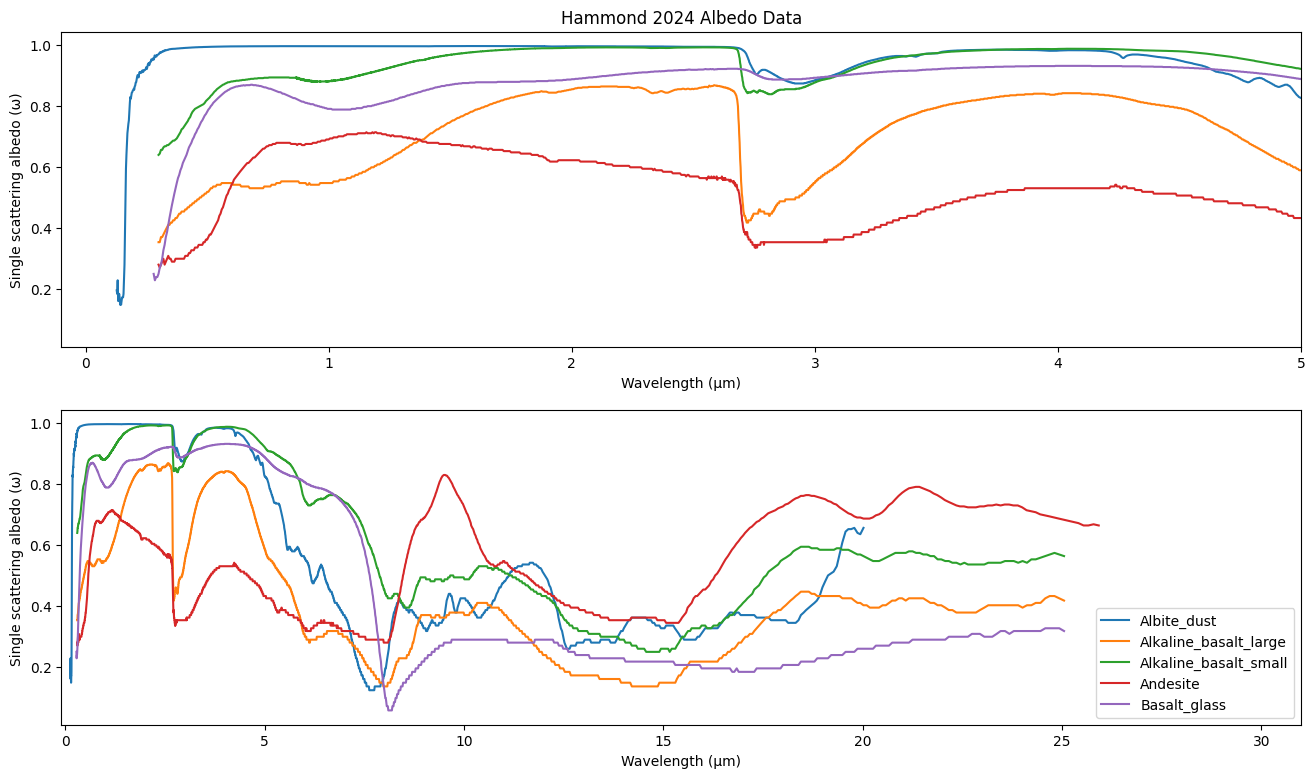

<Figure size 640x480 with 0 Axes>

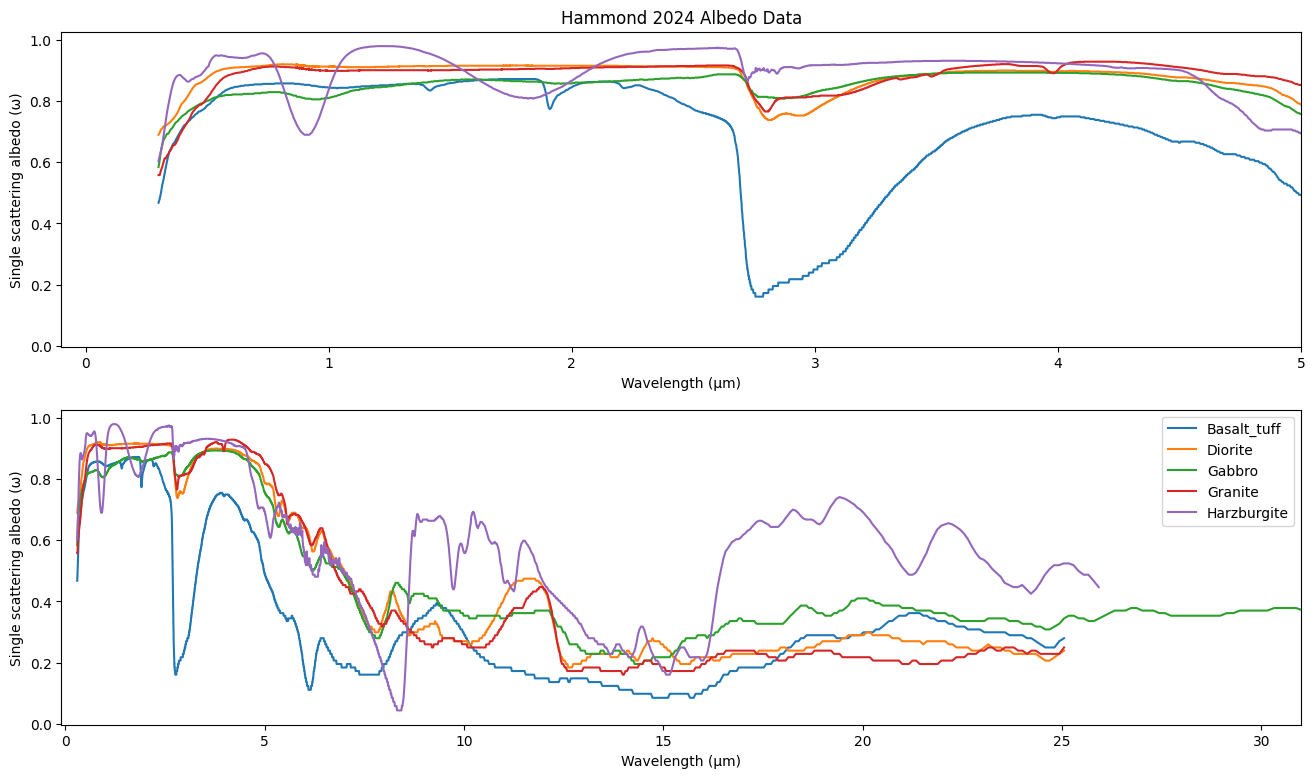

<Figure size 640x480 with 0 Axes>

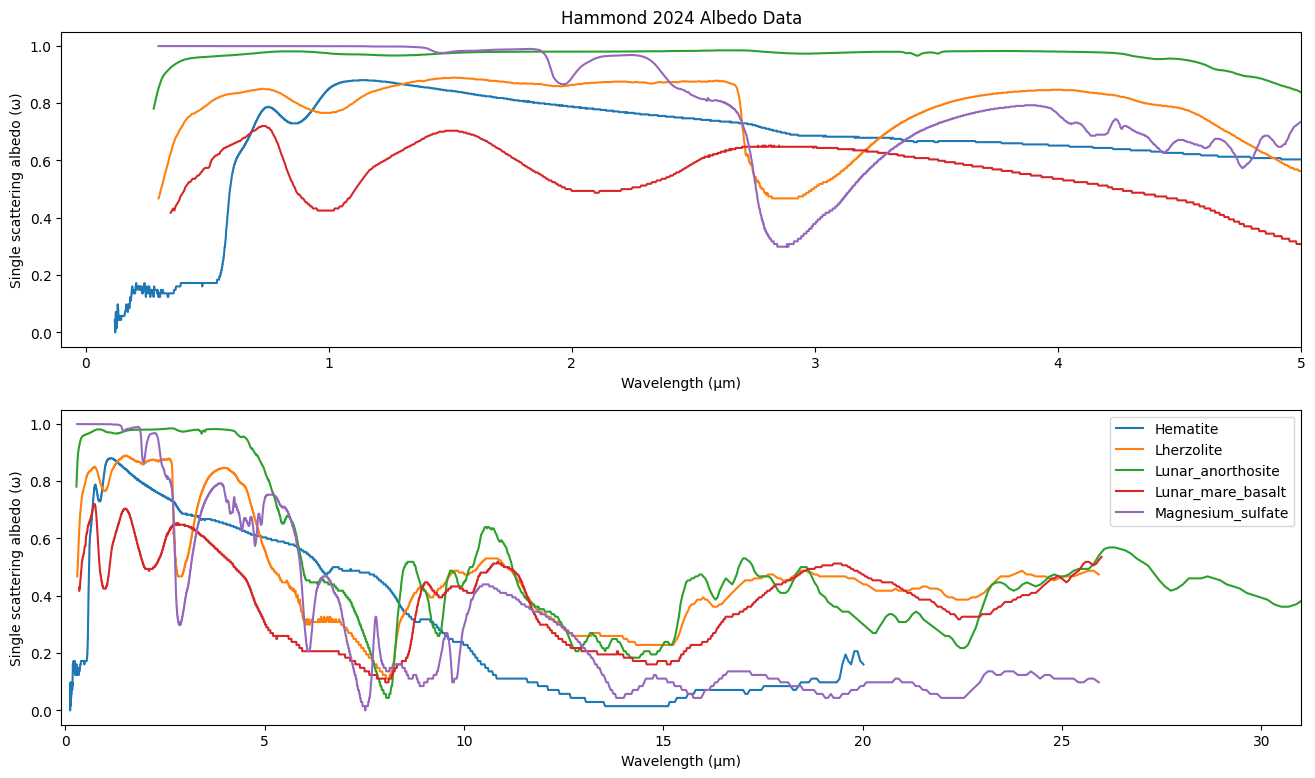

<Figure size 640x480 with 0 Axes>

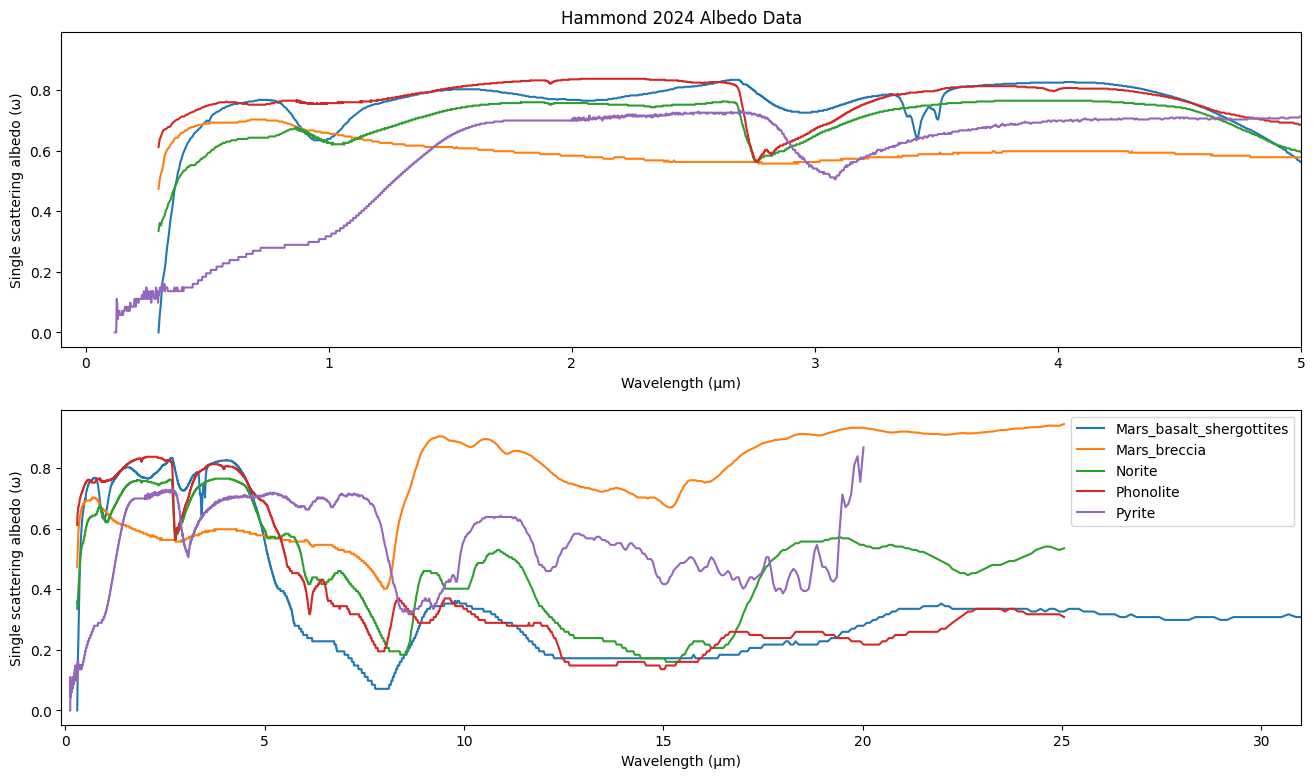

<Figure size 640x480 with 0 Axes>

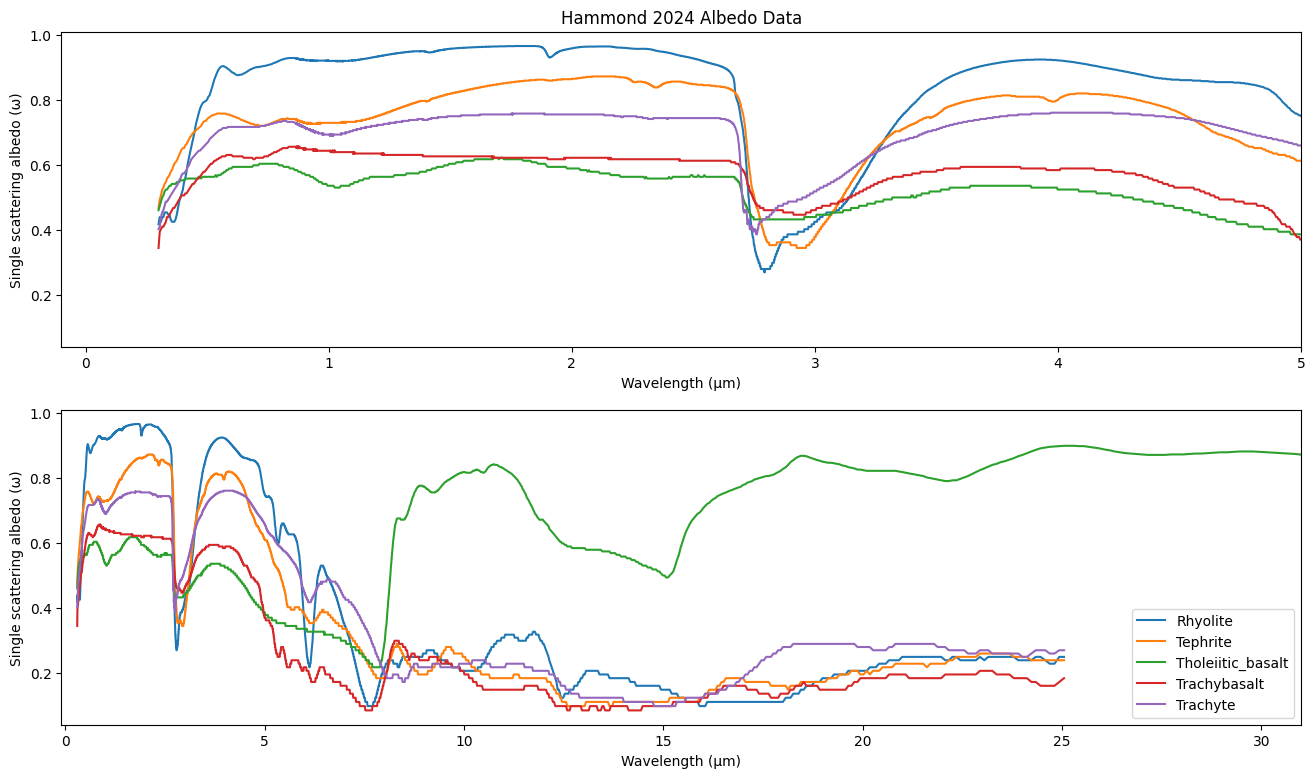

<Figure size 640x480 with 0 Axes>

In [1]:
from POSEIDON.surfaces import load_surface_components
import matplotlib.pyplot as plt 

Hammond_2024_data = ['Albite_dust', 'Alkaline_basalt_large', 'Alkaline_basalt_small', 
                     'Andesite', 'Basalt_glass', 'Basalt_tuff', 'Diorite', 'Gabbro', 
                     'Granite', 'Harzburgite', 'Hematite', 'Lherzolite', 'Lunar_anorthosite', 
                     'Lunar_mare_basalt', 'Magnesium_sulfate', 'Mars_basalt_shergottites', 
                     'Mars_breccia', 'Norite', 'Phonolite', 'Pyrite', 'Rhyolite', 'Tephrite', 
                     'Tholeiitic_basalt', 'Trachybasalt', 'Trachyte',]

# This function loads in the wavelength and albedo of each txt file 
surface_component_albedos = load_surface_components(Hammond_2024_data)

# Plot
fig, (ax1,ax2) = plt.subplots(2, figsize = (16,9))

for n in range(len(surface_component_albedos)):

    m = n + 1
    ax1.plot(surface_component_albedos[n][0], surface_component_albedos[n][1], label = Hammond_2024_data[n])
    ax2.plot(surface_component_albedos[n][0], surface_component_albedos[n][1], label = Hammond_2024_data[n])

    if m%5 == 0:
        ax2.set_xlabel('Wavelength (μm)')
        ax2.set_ylabel('Single scattering albedo (ω)')
        ax2.set_xlim((-0.1, 31))
        ax2.legend()
        
        ax1.set_xlabel('Wavelength (μm)')
        ax1.set_ylabel('Single scattering albedo (ω)')
        ax1.set_xlim((-0.1, 5))
        ax1.set_title('Hammond 2024 Albedo Data')
        plt.show()
        plt.clf()

        # Make a new plot 
        if m != 25:
            fig, (ax1,ax2) = plt.subplots(2, figsize = (16,9))

#### 2. Reflection Specta from Coelho 2024

- Reflection spectrum of purple bacteria in Table S1
- https://academic.oup.com/mnras/article/530/2/1363/7645230
- Name is type of organism / enrichment (column 4) + color (column 3) + ID full (column 2)
- Acessed data through zenodo 
- Glo, RV, BV, and Ana are bacteria in pure culture (a population of just one species),
  while E1-E53 are communities made out of different organisms where the dominance is the one naming the sample. 
  "E" means "enrichment" meaning it's a community of several organisms but that community is enriched in either 
  PSB or PNSB.

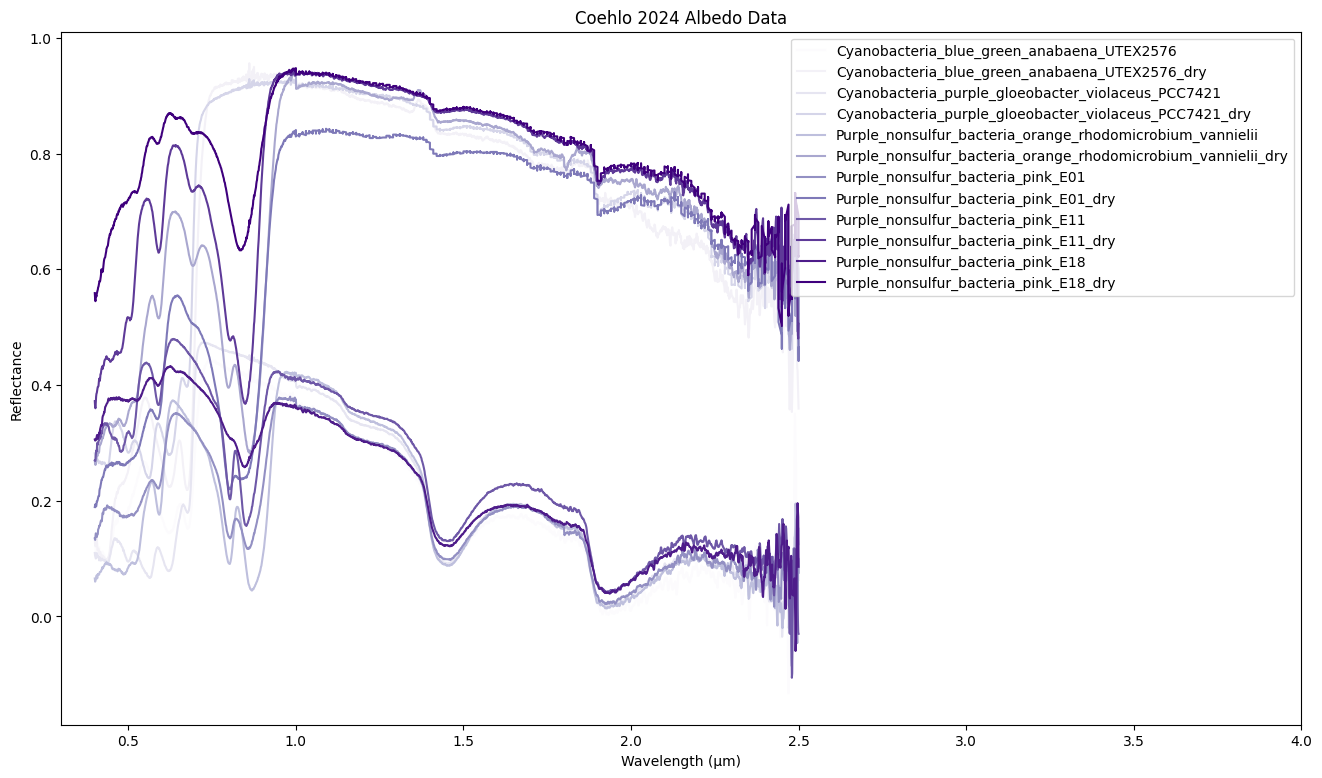

<Figure size 640x480 with 0 Axes>

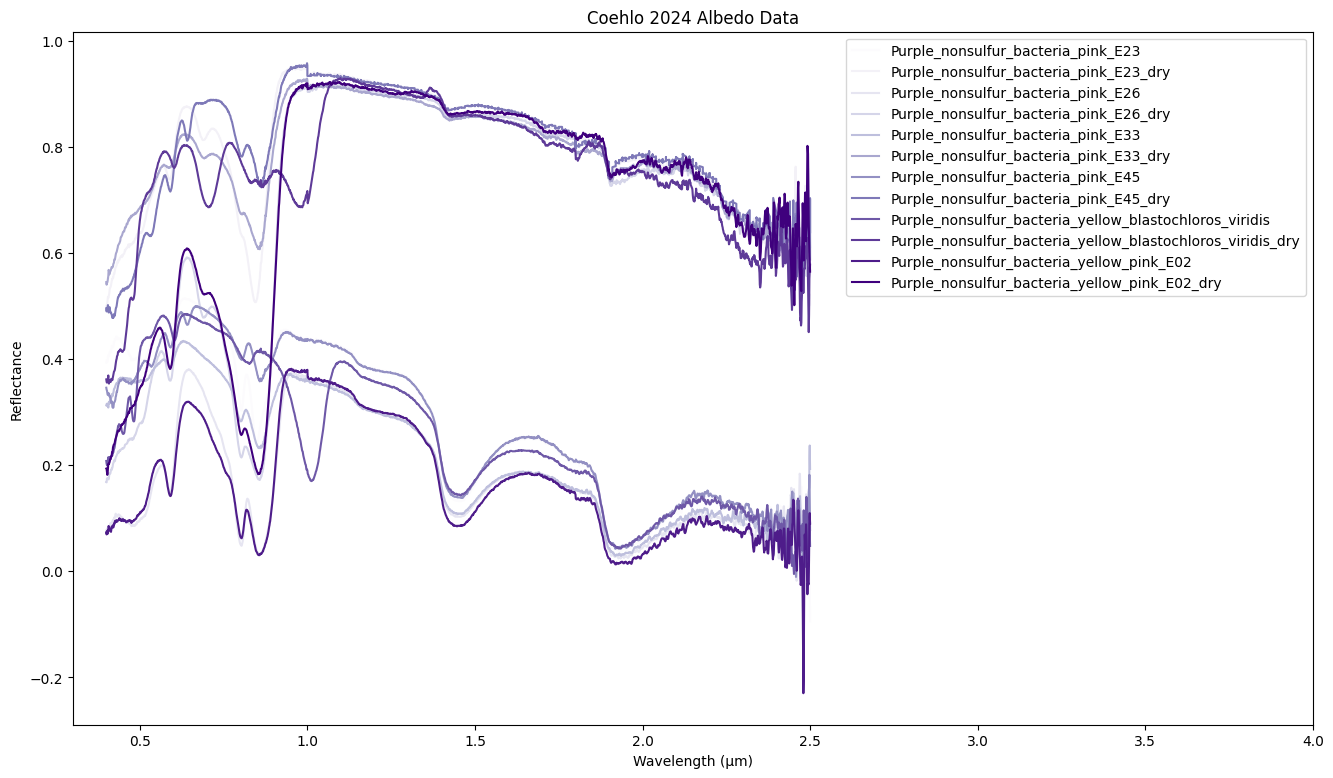

<Figure size 640x480 with 0 Axes>

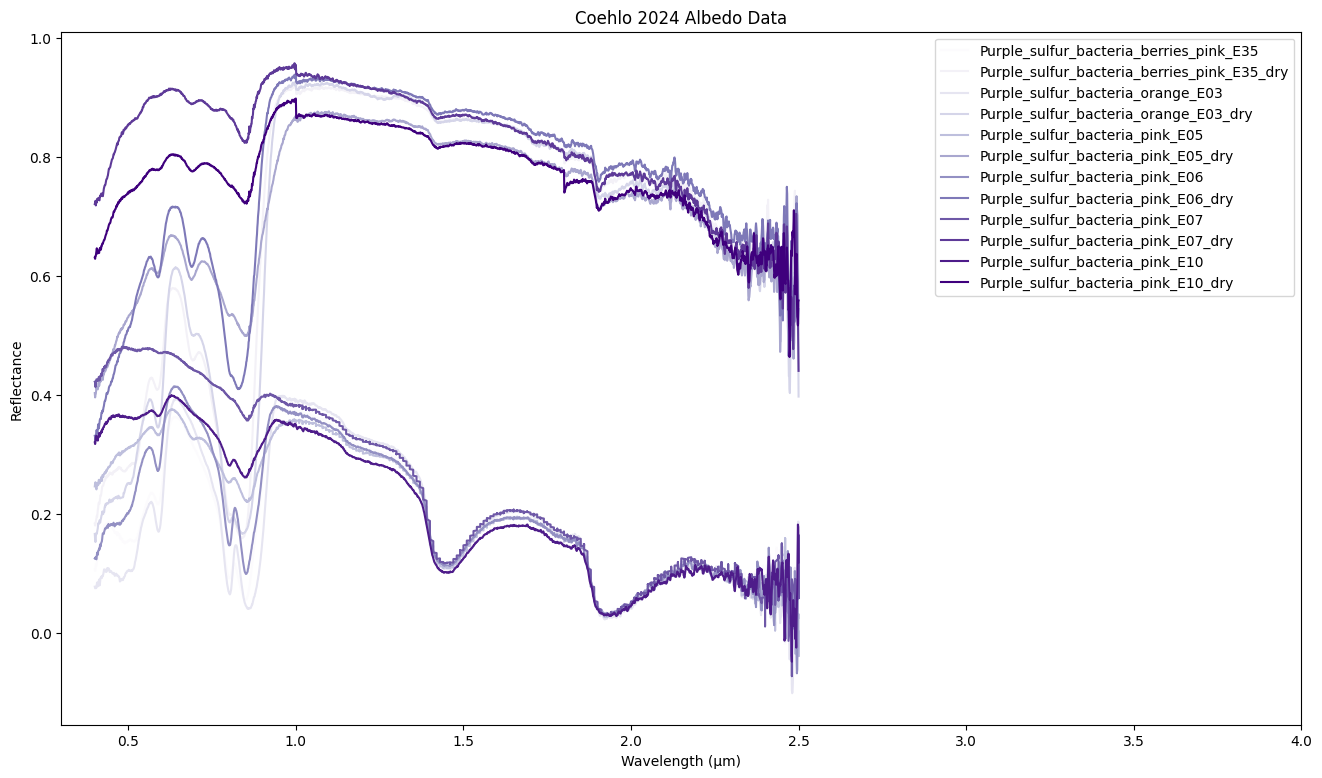

<Figure size 640x480 with 0 Axes>

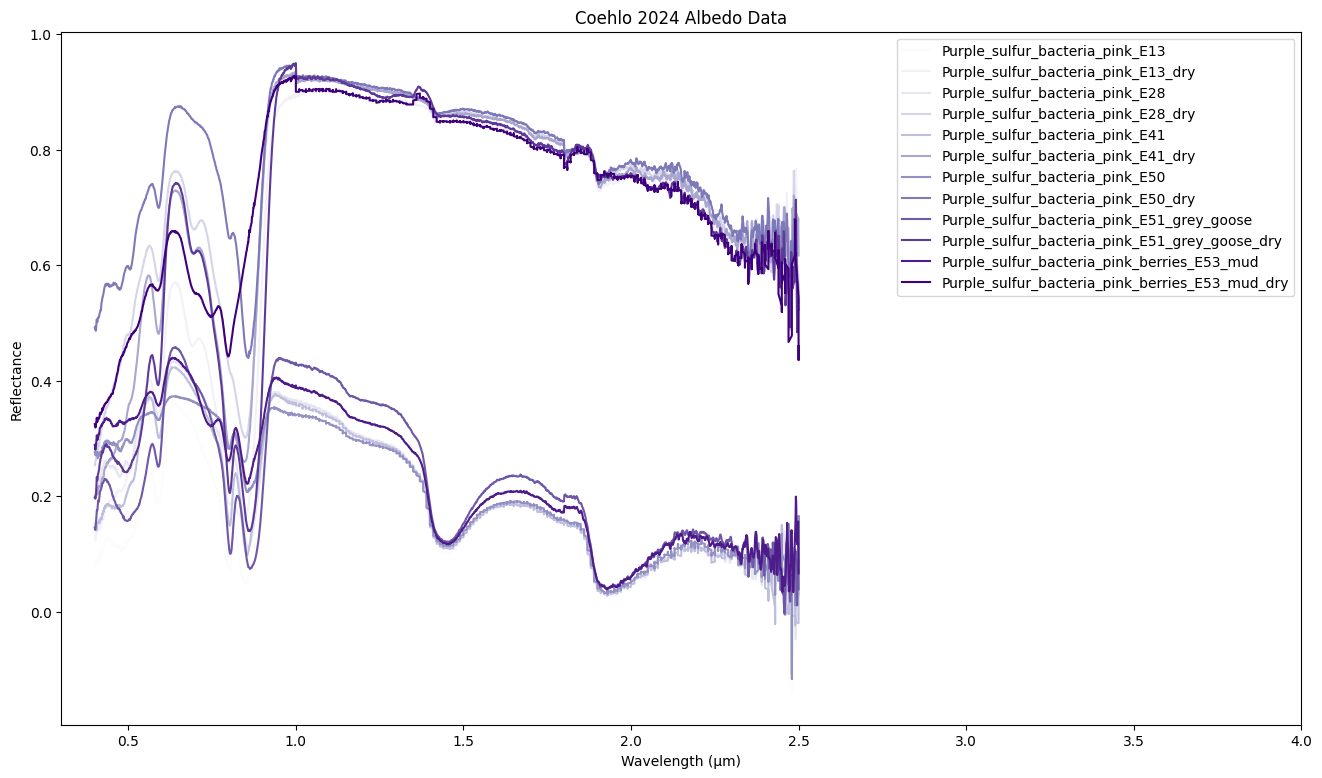

<Figure size 640x480 with 0 Axes>

In [2]:
from POSEIDON.surfaces import load_surface_components
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

Coelho_2024_data = ['Cyanobacteria_blue_green_anabaena_UTEX2576', 'Cyanobacteria_blue_green_anabaena_UTEX2576_dry',
                    'Cyanobacteria_purple_gloeobacter_violaceus_PCC7421', 'Cyanobacteria_purple_gloeobacter_violaceus_PCC7421_dry', 
                    'Purple_nonsulfur_bacteria_orange_rhodomicrobium_vannielii', 'Purple_nonsulfur_bacteria_orange_rhodomicrobium_vannielii_dry', 
                    'Purple_nonsulfur_bacteria_pink_E01', 'Purple_nonsulfur_bacteria_pink_E01_dry', 
                    'Purple_nonsulfur_bacteria_pink_E11', 'Purple_nonsulfur_bacteria_pink_E11_dry', 
                    'Purple_nonsulfur_bacteria_pink_E18', 'Purple_nonsulfur_bacteria_pink_E18_dry', 
                    'Purple_nonsulfur_bacteria_pink_E23', 'Purple_nonsulfur_bacteria_pink_E23_dry', 
                    'Purple_nonsulfur_bacteria_pink_E26', 'Purple_nonsulfur_bacteria_pink_E26_dry', 
                    'Purple_nonsulfur_bacteria_pink_E33', 'Purple_nonsulfur_bacteria_pink_E33_dry', 
                    'Purple_nonsulfur_bacteria_pink_E45', 'Purple_nonsulfur_bacteria_pink_E45_dry', 
                    'Purple_nonsulfur_bacteria_yellow_blastochloros_viridis', 'Purple_nonsulfur_bacteria_yellow_blastochloros_viridis_dry', 
                    'Purple_nonsulfur_bacteria_yellow_pink_E02', 'Purple_nonsulfur_bacteria_yellow_pink_E02_dry', 
                    'Purple_sulfur_bacteria_berries_pink_E35', 'Purple_sulfur_bacteria_berries_pink_E35_dry', 
                    'Purple_sulfur_bacteria_orange_E03', 'Purple_sulfur_bacteria_orange_E03_dry', 
                    'Purple_sulfur_bacteria_pink_E05', 'Purple_sulfur_bacteria_pink_E05_dry', 
                    'Purple_sulfur_bacteria_pink_E06', 'Purple_sulfur_bacteria_pink_E06_dry', 
                    'Purple_sulfur_bacteria_pink_E07', 'Purple_sulfur_bacteria_pink_E07_dry', 
                    'Purple_sulfur_bacteria_pink_E10', 'Purple_sulfur_bacteria_pink_E10_dry', 
                    'Purple_sulfur_bacteria_pink_E13', 'Purple_sulfur_bacteria_pink_E13_dry', 
                    'Purple_sulfur_bacteria_pink_E28', 'Purple_sulfur_bacteria_pink_E28_dry', 
                    'Purple_sulfur_bacteria_pink_E41', 'Purple_sulfur_bacteria_pink_E41_dry', 
                    'Purple_sulfur_bacteria_pink_E50', 'Purple_sulfur_bacteria_pink_E50_dry', 
                    'Purple_sulfur_bacteria_pink_E51_grey_goose', 'Purple_sulfur_bacteria_pink_E51_grey_goose_dry', 
                    'Purple_sulfur_bacteria_pink_berries_E53_mud', 'Purple_sulfur_bacteria_pink_berries_E53_mud_dry',]

# This function loads in the wavelength and albedo of each txt file 
surface_component_albedos = load_surface_components(Coelho_2024_data)

# Plot
fig, (ax1) = plt.subplots(1, figsize = (16,9))

color = cm.Purples(np.linspace(0, 1, 12))

for n in range(len(surface_component_albedos)):

    m = n + 1

    if n < 12:
        color_index = n
    else:
        color_index = n - (12*int(n/12))

    ax1.plot(surface_component_albedos[n][0], surface_component_albedos[n][1], label = Coelho_2024_data[n], color = color[color_index])

    if m%12 == 0:
        
        ax1.set_xlabel('Wavelength (μm)')
        ax1.set_ylabel('Reflectance')
        ax1.set_xlim((0.3, 4))
        ax1.set_title('Coehlo 2024 Albedo Data')
        ax1.legend()
        plt.show()
        plt.clf()

        # Make a new plot 
        if m != 48:
            fig, (ax1) = plt.subplots(1, figsize = (16,9))

#### 3. Reflection Specta from Madden & Kaltenegger (2018)
- A Catalog of Spectra, Albedos, and Colors of Solar System Bodies
- Albedo spectrum of solar system bodies 
- https://www.liebertpub.com/doi/epub/10.1089/ast.2017.1763
- Names taken from Table 1 and Table 2, data acessed through zenodo 

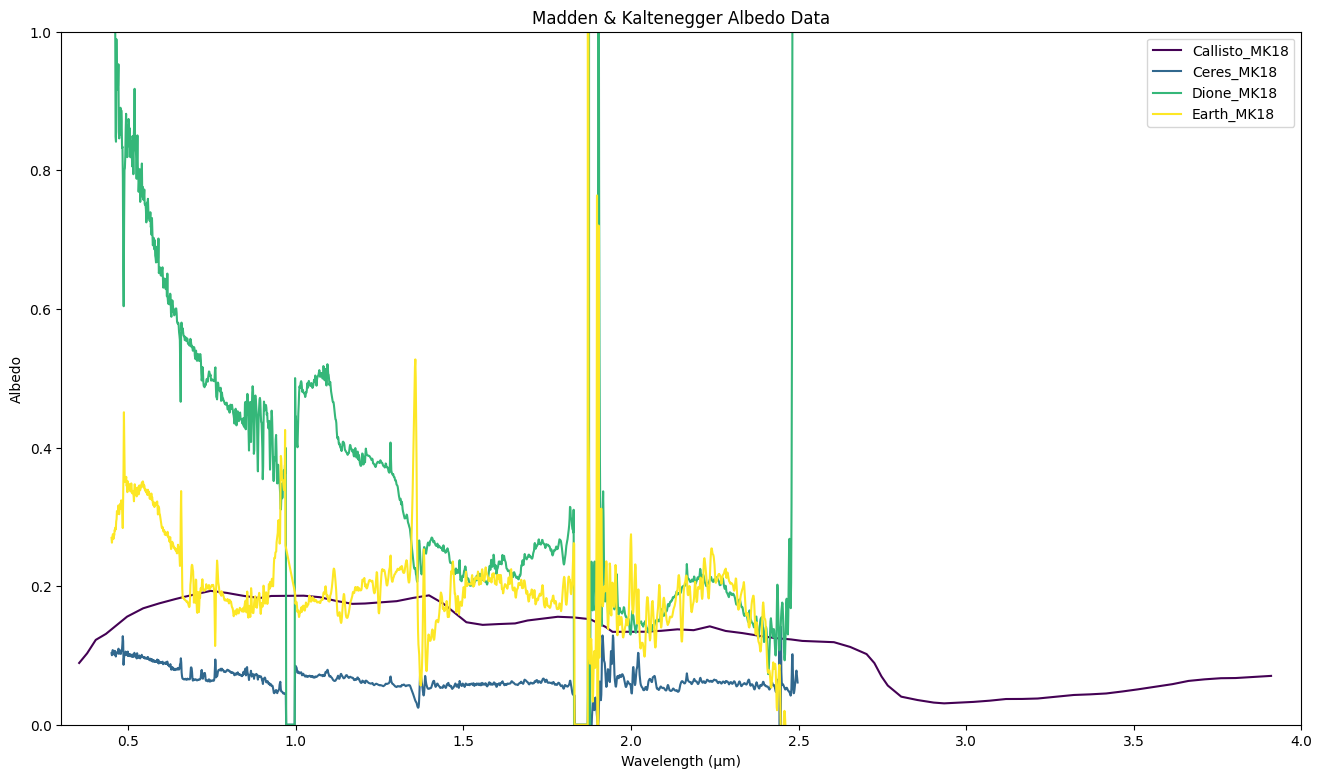

<Figure size 640x480 with 0 Axes>

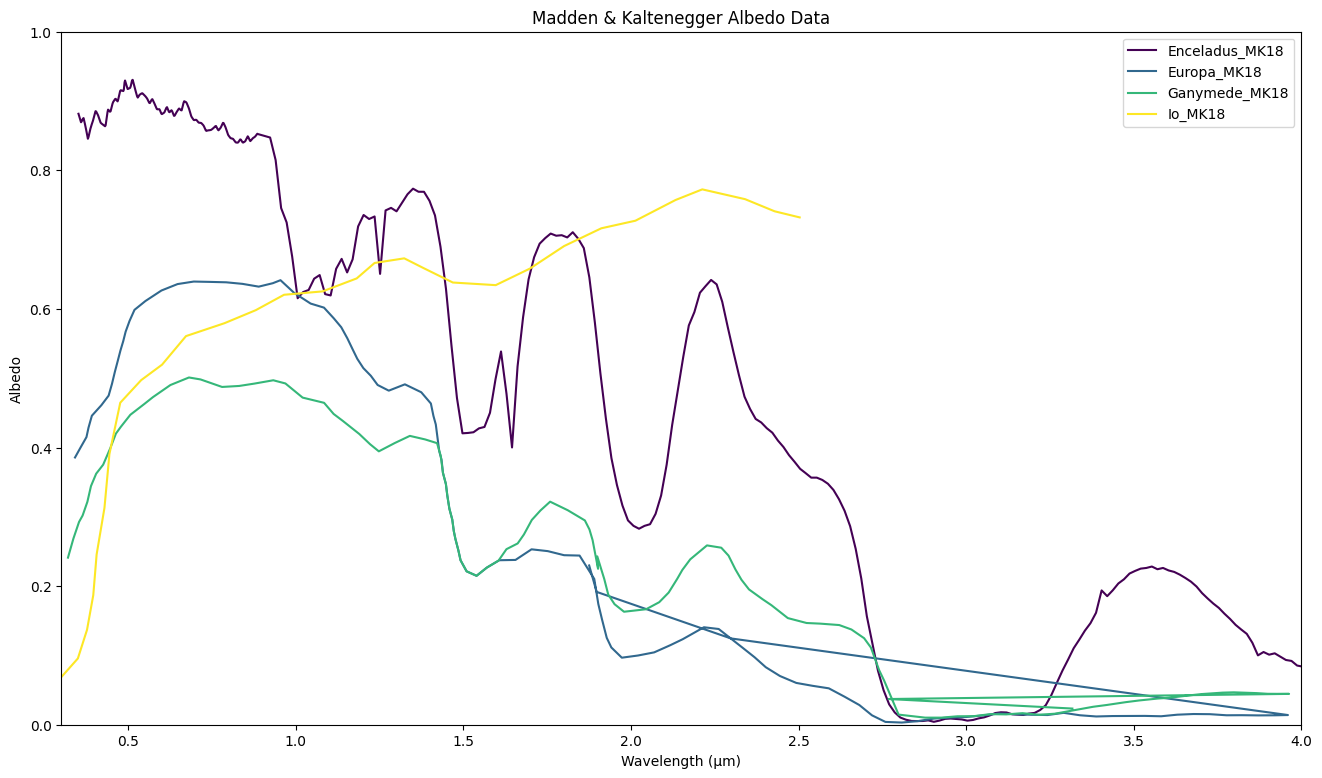

<Figure size 640x480 with 0 Axes>

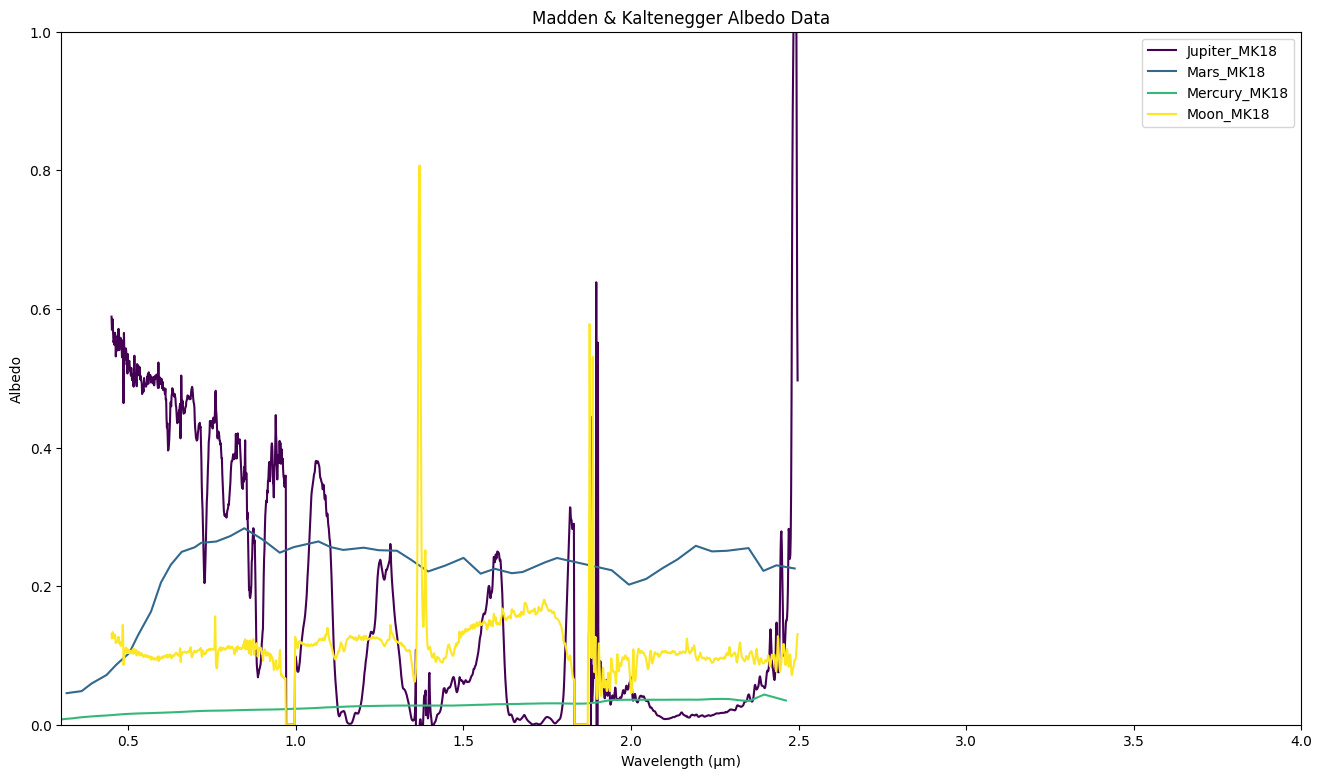

<Figure size 640x480 with 0 Axes>

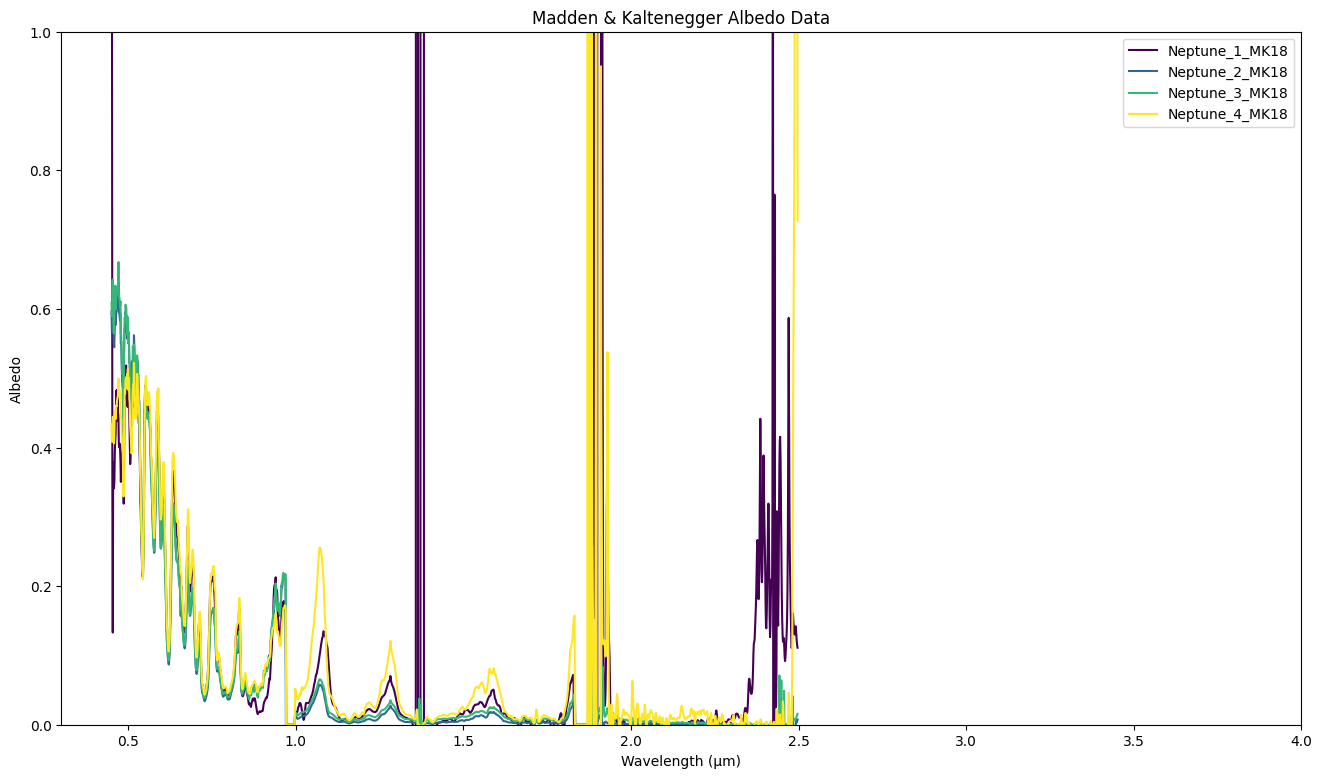

<Figure size 640x480 with 0 Axes>

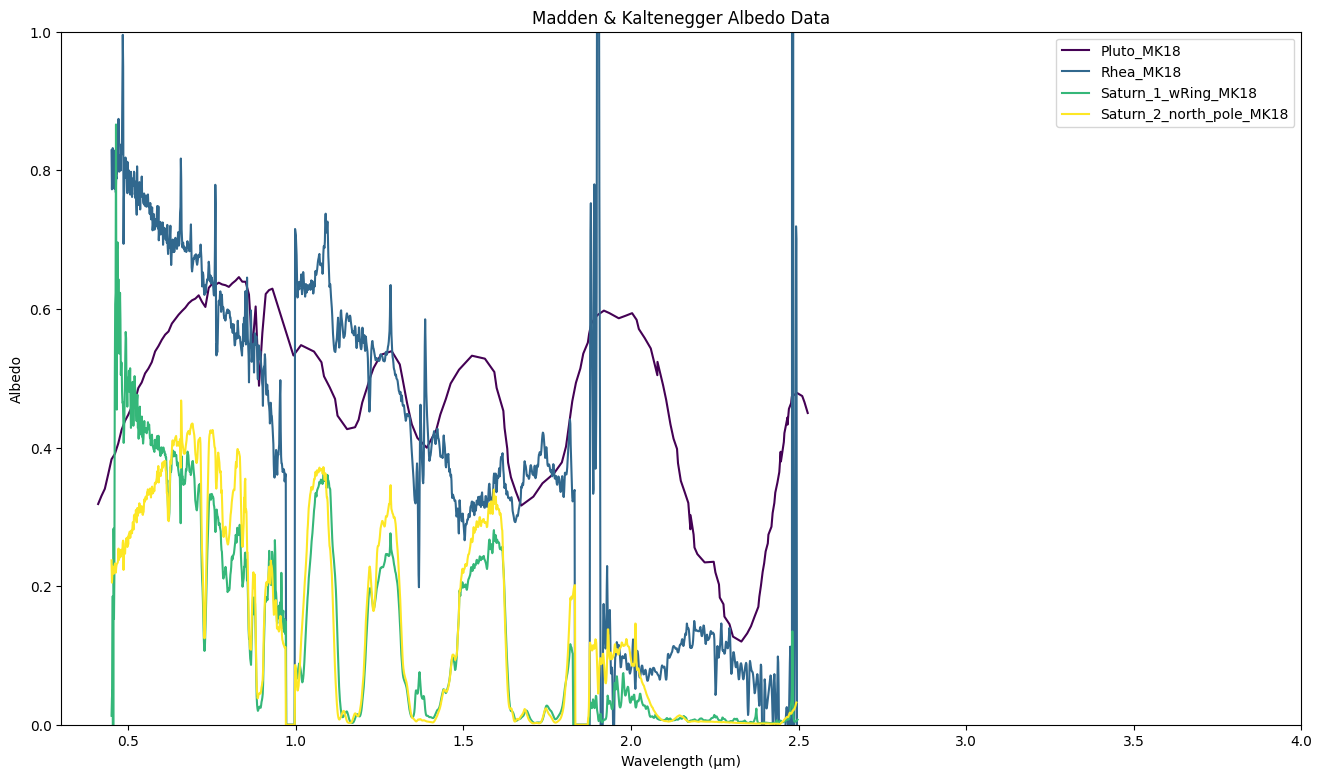

<Figure size 640x480 with 0 Axes>

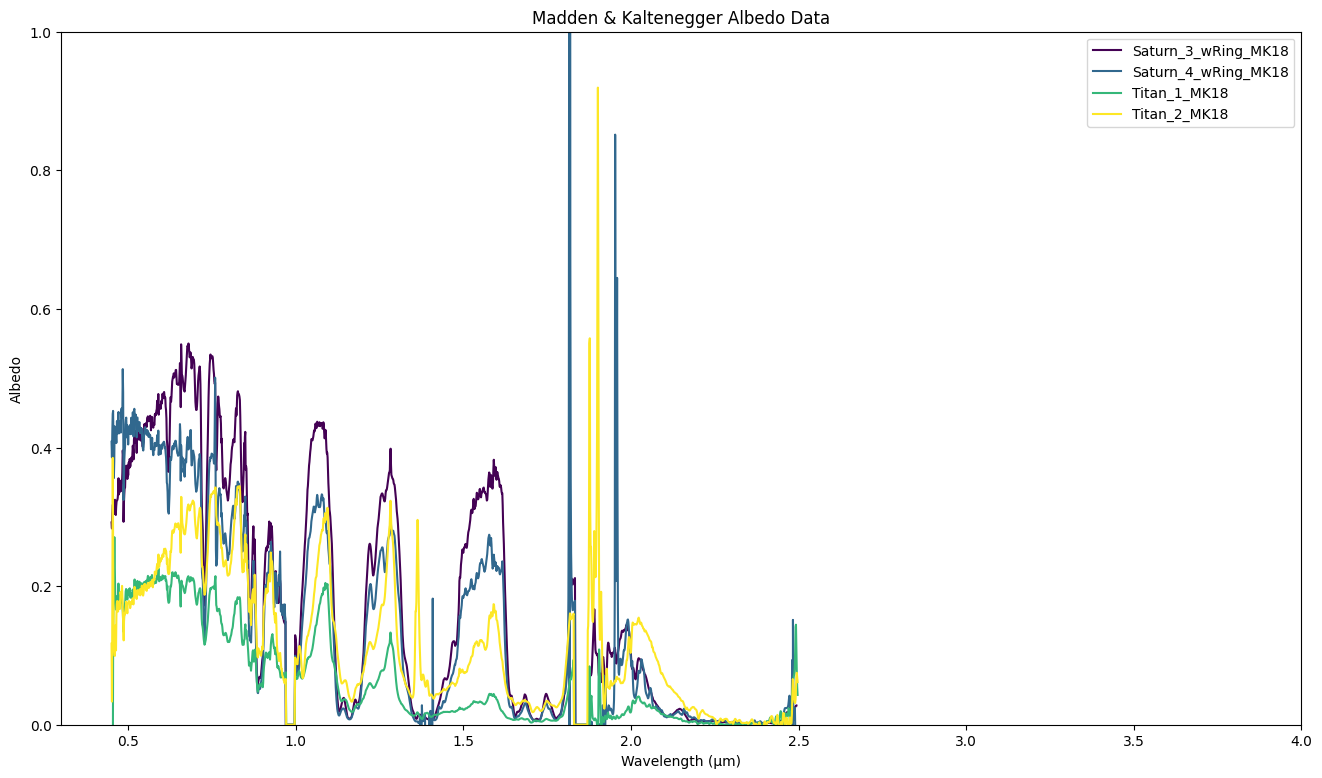

<Figure size 640x480 with 0 Axes>

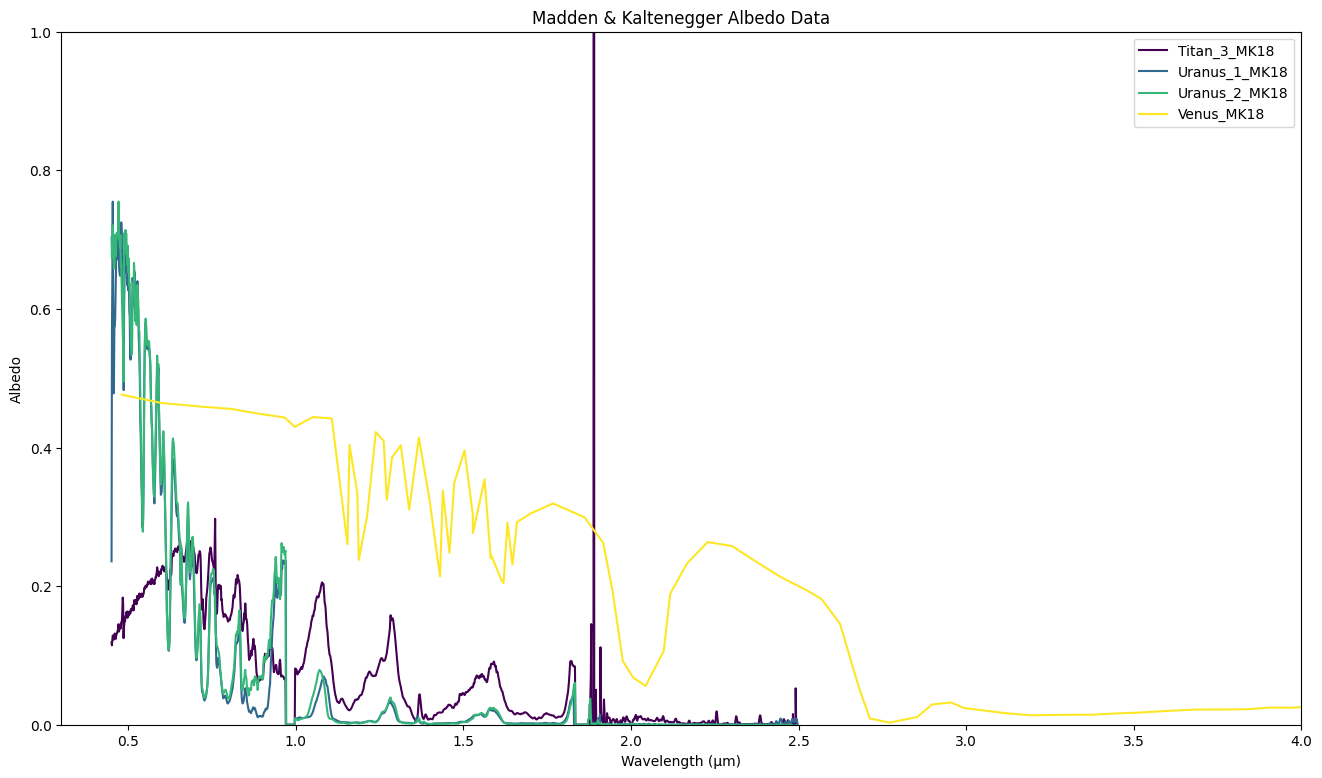

<Figure size 640x480 with 0 Axes>

In [3]:
from POSEIDON.surfaces import load_surface_components
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

Madden_Kaltenegger_2018_data = ['Callisto_MK18', 'Ceres_MK18', 'Dione_MK18', 'Earth_MK18', 'Enceladus_MK18', 
                                'Europa_MK18', 'Ganymede_MK18', 'Io_MK18', 'Jupiter_MK18', 'Mars_MK18', 
                                'Mercury_MK18', 'Moon_MK18', 'Neptune_1_MK18', 'Neptune_2_MK18', 'Neptune_3_MK18', 
                                'Neptune_4_MK18', 'Pluto_MK18', 'Rhea_MK18', 'Saturn_1_wRing_MK18', 'Saturn_2_north_pole_MK18', 
                                'Saturn_3_wRing_MK18', 'Saturn_4_wRing_MK18', 'Titan_1_MK18', 'Titan_2_MK18', 'Titan_3_MK18', 
                                'Uranus_1_MK18', 'Uranus_2_MK18', 'Venus_MK18']

# This function loads in the wavelength and albedo of each txt file 
surface_component_albedos = load_surface_components(Madden_Kaltenegger_2018_data)

# Plot
fig, (ax1) = plt.subplots(1, figsize = (16,9))

color = cm.viridis(np.linspace(0, 1, 4))

for n in range(len(surface_component_albedos)):

    m = n + 1

    if n < 4:
        color_index = n
    else:
        color_index = n - (4*int(n/4))

    ax1.plot(surface_component_albedos[n][0], surface_component_albedos[n][1], label = Madden_Kaltenegger_2018_data[n], color = color[color_index])

    if m%4 == 0:
        
        ax1.set_xlabel('Wavelength (μm)')
        ax1.set_ylabel('Albedo')
        ax1.set_xlim((0.3, 4))
        ax1.set_ylim((0,1))
        ax1.set_title('Madden & Kaltenegger Albedo Data')
        ax1.legend()
        plt.show()
        plt.clf()

        # Make a new plot 
        if m != 28:
            fig, (ax1) = plt.subplots(1, figsize = (16,9))

# Reflecting and Emitting Surfaces

Here, we build off the transmission_terrestrial tutorial by defining Trappist-1e with a reflecting and emitting surface. 

We first look at short wavelength data (0.4 to 2.5), as most lab data only extends that far. Later, we will explore up to 14 um.

In [1]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_E, M_E
from POSEIDON.core import wl_grid_constant_R
from scipy.constants import parsec as pc
from scipy.constants import au

#***** Wavelength grid *****#
 
wl_min = 0.4      # Minimum wavelength (um)
wl_max = 2.5     # Maximum wavelength (um)

R = 10000         # Spectral resolution of grid
R = 1000

wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Define stellar properties *****#

R_s = 0.11697*R_Sun   # Stellar radius (m)
T_s = 2559.0          # Stellar effective temperature (K)
Met_s = 0.04          # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 5.21        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s, wl = wl) # <---- Remember to provide wavelength for emission/reflection!

#***** Define planet properties *****#

planet_name = 'TRAPPIST-1e'  # Planet name used for plots, output files etc.

R_p = 0.917985*R_E     # Planetary radius (m)
M_p = 0.6356*M_E       # Planetary mass (kg)
T_eq = 255.0           # Equilibrium temperature (K)
a_p = 0.2925 *au       # Planetary distance for host star (au)
d = 12.1 * pc          # System distance (pc)

# Create the planet object
planet = create_planet(planet_name, R_p, mass = M_p, T_eq = T_eq, a_p = a_p, d = d)

In order to define a generic surface, we set surface = True in the define_model function.

If we want a reflecting surface, we need to set reflection = True. If we want an emitting surface, we need to set scattering = True.

The reflection algorithm defines the surface as having an albedo vs wavelength. For the generic opaque surface, the albedo is set to 0 at all wavelengths (and therefore is completely absorbing). The thermal scattering algorithm defines the surface as having an emissivity vs wavelength (where emissivity is 1 - albedo). The temperature of the surface is equal the temperature of the pressure-temperature profile at P_surf.

There is a new parameter: surface_model

The default is 'gray', which defines the surface model is an opaque deck + infinitely absorbing surface (perfect blackbody).

'constant' defines a surface with a constant albedo (albedo_surf).

'lab_data' defines a surface that utilizes the lab data above. This functionality allows for multiple surface components, which are defined in the list 'surface_components'. 

Each surface component has a perecentage. For forward models these percentages will always be normalized to the maximum, and therefore add up to 100%. This functionality does not work with retrievals. 

In [2]:
from POSEIDON.core import define_model
import numpy as np

#***** Define models *****#

model_name_blackbody = 'Blackbody-Surface'   

bulk_species = ['N2']                                      # For terrestrial planets, only the single most abundant gas should be provided here
param_species = ['O2', 'CO2', 'CH4', 'H2O', 'O3', 'N2O'] 

# Create a model object with a blackbody surface
model_blackbody = define_model(model_name_blackbody, bulk_species, param_species, 
                               PT_profile = 'file_read', X_profile = 'file_read',
                               radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                               reflection = True, scattering = True) # <----- Set reflection and scattering to True


print(model_blackbody['param_names'])

['R_p_ref' 'log_O2' 'log_CO2' 'log_CH4' 'log_H2O' 'log_O3' 'log_N2O'
 'log_P_surf']


In [3]:
model_name_const = 'Constant-Albedo-Surface'  

bulk_species = ['N2']                     
param_species = ['O2', 'CO2', 'CH4', 'H2O', 'O3', 'N2O'] 

model_const = define_model(model_name_const, bulk_species, param_species, 
                           PT_profile = 'file_read', X_profile = 'file_read',
                           radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                           reflection = True, scattering = True, # <----- Set reflection and scattering to True
                           surface_model = 'constant',)          # <----- Set surface_model to 'constant'

print(model_const['param_names'])

['R_p_ref' 'log_O2' 'log_CO2' 'log_CH4' 'log_H2O' 'log_O3' 'log_N2O'
 'log_P_surf' 'albedo_surf']


In [15]:
model_name_lab = 'Lab-Data-Albedo-Surface'  

surface_components = ['Purple_sulfur_bacteria_pink_berries_E53_mud_dry','Lunar_mare_basalt'] # <----- List surface compoenents here 

model_lab = define_model(model_name_lab, bulk_species, param_species, 
                       PT_profile = 'file_read', X_profile = 'file_read', 
                       radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                       reflection = True, scattering = True, # <----- Set reflection and scattering to True
                       surface_model = 'lab_data',           # <----- Set surface_model to 'lab_data'
                       surface_components = surface_components) # <----- Input surface_components

print(model_lab['param_names'])

['R_p_ref' 'log_O2' 'log_CO2' 'log_CH4' 'log_H2O' 'log_O3' 'log_N2O'
 'log_P_surf' 'Purple_sulfur_bacteria_pink_berries_E53_mud_dry_percentage'
 'Lunar_mare_basalt_percentage']


Load in the files (same steps as transmission_terrestrial.ipynb)

In [5]:
from POSEIDON.utility import read_PT_file

#***** Create model pressure grid (same for both models) *****#

# Specify the pressure grid of the atmosphere
P_min = 1.0e-7    # 0.1 ubar
P_max = 10.0      # 10 bar (you can extend the atmosphere deeper than the surface)
N_layers = 100    # 100 layers

P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify location of the P-T profile file
PT_file_dir = '../../../POSEIDON/reference_data/models/TRAPPIST-1e'
PT_file_name_1 = 'TRAPPIST-1e_1.0bar_100xCO2_Modern_PT.txt'
PT_file_name_2 = 'TRAPPIST-1e_1.0bar_100xCO2_Archean_PT.txt'

# Read the P-T profile files
T_Modern = read_PT_file(PT_file_dir, PT_file_name_1, P, skiprows = 1,
                        P_column = 2, T_column = 3)
T_Archean = read_PT_file(PT_file_dir, PT_file_name_2, P, skiprows = 1,
                        P_column = 2, T_column = 3)

from POSEIDON.utility import read_chem_file

# Specify location of the composition file
chem_file_dir = '../../../POSEIDON/reference_data/models/TRAPPIST-1e'
chem_file_name_1 = 'TRAPPIST-1e_1.0bar_100xCO2_Modern_chem.txt'
chem_file_name_2 = 'TRAPPIST-1e_1.0bar_100xCO2_Archean_chem.txt'

chem_species_file = ['N2', 'O2', 'O3', 'H2O', 'CH4', 'N2O', 'CO2', 'CO']  # Same ordering for both files

# Read the composition files
X_Modern = read_chem_file(chem_file_dir, chem_file_name_1, P, chem_species_file, 
                          chem_species_in_model = model_blackbody['chemical_species'], 
                          skiprows = 1)
X_Archean = read_chem_file(chem_file_dir, chem_file_name_2, P, chem_species_file, 
                           chem_species_in_model = model_blackbody['chemical_species'], 
                           skiprows = 1)

Let's define our atmosphere objects.

For our blackbody surface, all we need to do is provide log_P_surf (the pressure at which the surface top is)

In [6]:
from POSEIDON.core import make_atmosphere

P_ref = 1      # We'll set the reference pressure at the surface
R_p_ref = R_p  # Radius at reference pressure

log_P_surf = 0 # Surface pressure is 1 bar

surface_params = np.array([log_P_surf]) #<---- Put surface params into new list, surface_params

atmosphere_blackbody = make_atmosphere(planet, model_blackbody, P, P_ref, R_p_ref, 
                                       T_input = T_Archean, X_input = X_Archean,
                                       surface_params = surface_params)  #<---- Put surface params into make_atmosphere

For our constant albedo surface, we also need to provide albedo_surf (ranges 0 to 1 where 0 is absorbing 100% and 1 is reflecting 100%)

In [7]:
from POSEIDON.core import make_atmosphere
from POSEIDON.visuals import plot_geometry, plot_PT, plot_chem


P_ref = 1      # We'll set the reference pressure at the surface
R_p_ref = R_p  # Radius at reference pressure

log_P_surf = 0        # Surface pressure is 1 bar
surface_albedo = 0.5  # Half reflecting, half absorbing 

surface_params = np.array([log_P_surf, surface_albedo,]) #<---- Put surface params into new list, surface_params

# Generate the atmospheres
atmosphere_const = make_atmosphere(planet, model_const, P, P_ref, R_p_ref, 
                                   T_input = T_Archean, X_input = X_Archean,
                                   surface_params = surface_params)  #<---- Put surface params into make_atmosphere   

In [16]:
from POSEIDON.core import make_atmosphere
from POSEIDON.visuals import plot_geometry, plot_PT, plot_chem


P_ref = 1      # We'll set the reference pressure at the surface
R_p_ref = R_p  # Radius at reference pressure

log_P_surf = 0        # Surface pressure is 1 bar
Purple_sulfur_bacteria_pink_berries_E53_mud_dry_percentage = 0.5 # 50% purple cyanobacteria (dried up)
Lunar_mare_basalt_percentage = 0.5 # 50% moon rock

surface_params = np.array([log_P_surf, 
                           Purple_sulfur_bacteria_pink_berries_E53_mud_dry_percentage,
                           Lunar_mare_basalt_percentage]) #<---- Put surface params into new list, surface_params

# Generate the atmospheres
atmosphere_lab = make_atmosphere(planet, model_lab, P, P_ref, R_p_ref, 
                                   T_input = T_Archean, X_input = X_Archean,
                                   surface_params = surface_params)   #<---- Put surface params into make_atmosphere   

In [9]:
from POSEIDON.core import read_opacities, wl_grid_constant_R

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 100     # 100 K lower limit covers the TRAPPIST-1e P-T profile
T_fine_max = 300     # 300 K upper limit covers the TRAPPIST-1e P-T profile
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 0.0    # 1 bar is the surface pressure, so no need to go deeper
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Create opacity object (both models share the same molecules, so we only need one)
opac = read_opacities(model_blackbody, wl, opacity_treatment, T_fine, log_P_fine,
                      opacity_database = 'Temperate')

Reading in cross sections in opacity sampling mode...
CO2-CO2 done
CO2-CH4 done
N2-N2 done
N2-H2O done
O2-O2 done
O2-CO2 done
O2-N2 done
O2 done
CO2 done
CH4 done
H2O done
O3 done
N2O done
Opacity pre-interpolation complete.


#### Comparing TRAPPIST-1e model spectra

Finally, let's generate and compare the Modern Earth and Archean Earth emission spectra.

Below, we will demonstrate Fp/Fs spectra as well as Fp spectra.

In [18]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

spectrum_blackbody_FpFs, albedo_blackbody = compute_spectrum(planet, star, model_blackbody, atmosphere_blackbody, opac, wl,
                                                            spectrum_type = 'emission', return_albedo = True, use_photosphere_radius= True)

spectrum_const_FpFs, albedo_const = compute_spectrum(planet, star, model_const, atmosphere_const, opac, wl,
                                                    spectrum_type = 'emission', return_albedo = True, use_photosphere_radius= True)

spectrum_lab_data_FpFs, albedo_labdata = compute_spectrum(planet, star, model_lab, atmosphere_lab, opac, wl,
                                                          spectrum_type = 'emission', return_albedo = True, use_photosphere_radius= True)

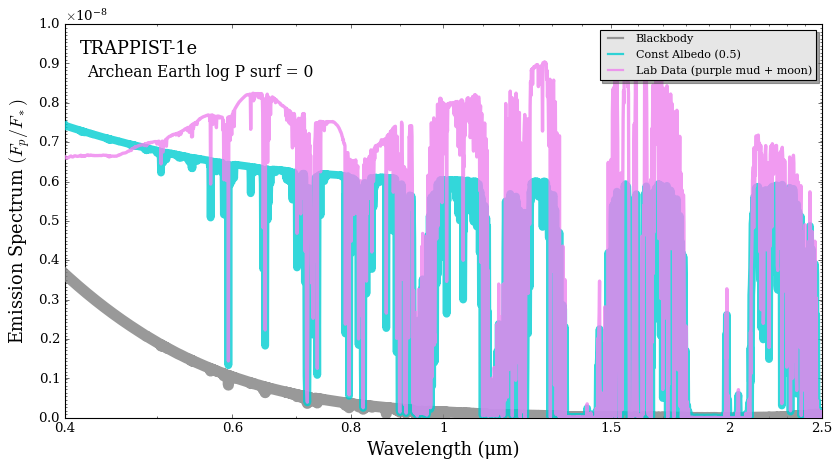

In [19]:
spectra = []   # Empty plot collection

# Add the three model spectra to the plot collection object
spectra = plot_collection(spectrum_blackbody_FpFs, wl, collection = spectra)
spectra = plot_collection(spectrum_const_FpFs, wl, collection = spectra)
spectra = plot_collection(spectrum_lab_data_FpFs, wl, collection = spectra)

# Produce figure
fig_spec = plot_spectra(spectra, planet, R_to_bin = 1000, plot_full_res = False,
                        spectra_labels = ['Blackbody','Const Albedo (0.5)', 'Lab Data (purple mud + moon)'],
                        colour_list = ['gray','darkturquoise', 'violet'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth log P surf = 0'),
                        figure_shape = 'wide',
                        y_unit = 'eclipse_depth',)  

In [20]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

spectrum_blackbody_Fp, albedo_blackbody = compute_spectrum(planet, star, model_blackbody, atmosphere_blackbody, opac, wl,
                                                            spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

spectrum_const_Fp, albedo_const = compute_spectrum(planet, star, model_const, atmosphere_const, opac, wl,
                                                    spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

spectrum_lab_data_Fp, albedo_labdata = compute_spectrum(planet, star, model_lab, atmosphere_lab, opac, wl,
                                                          spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

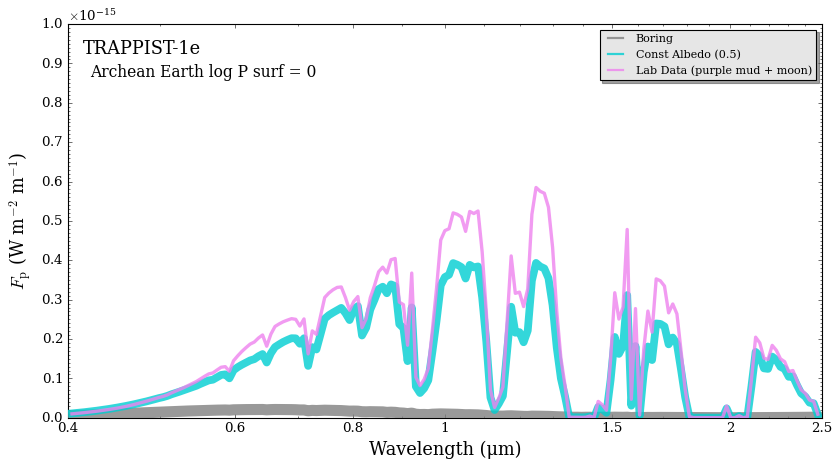

In [21]:
spectra = []   # Empty plot collection

# Add the three model spectra to the plot collection object
spectra = plot_collection(spectrum_blackbody_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_const_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_lab_data_Fp, wl, collection = spectra)

# Produce figure and save to file
fig_spec = plot_spectra(spectra, planet, R_to_bin = 100, plot_full_res = False,
                        spectra_labels = ['Boring','Const Albedo (0.5)', 'Lab Data (purple mud + moon)'],
                        colour_list = ['gray','darkturquoise', 'violet'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth log P surf = 0'),
                        figure_shape = 'wide',
                        y_unit = 'Fp',
                        y_max = 1e-15)  

# Longer wavelengths 

We might want to look at emitting surfaces in longer IR wavelengths instead

In [19]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_E, M_E
from POSEIDON.core import wl_grid_constant_R
from scipy.constants import parsec as pc
from scipy.constants import au

#***** Wavelength grid *****#
 
wl_min = 0.4      # Minimum wavelength (um)
wl_max = 15     # Maximum wavelength (um)

R = 10000         # Spectral resolution of grid
R = 1000

wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Define stellar properties *****#

R_s = 0.11697*R_Sun   # Stellar radius (m)
T_s = 2559.0          # Stellar effective temperature (K)
Met_s = 0.04          # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 5.21        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s, wl = wl) # <---- Remember to provide wavelength for emission/reflection!

In [20]:
from POSEIDON.core import read_opacities, wl_grid_constant_R

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 100     # 100 K lower limit covers the TRAPPIST-1e P-T profile
T_fine_max = 300     # 300 K upper limit covers the TRAPPIST-1e P-T profile
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 0.0    # 1 bar is the surface pressure, so no need to go deeper
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Create opacity object (both models share the same molecules, so we only need one)
opac_longer = read_opacities(model_blackbody, wl, opacity_treatment, T_fine, log_P_fine,
                             opacity_database = 'Temperate')

Reading in cross sections in opacity sampling mode...
CO2-CO2 done
CO2-CH4 done
N2-N2 done
N2-H2O done
O2-O2 done
O2-CO2 done
O2-N2 done
O2 done
CO2 done
CH4 done
H2O done
O3 done
N2O done
Opacity pre-interpolation complete.


In [21]:
model_name_lab_IR = 'Lab-Data-Albedo-Surface-IR'  

surface_components = ['Mars_breccia','Lunar_mare_basalt'] # <----- List surface compoenents here 

model_lab_IR = define_model(model_name_lab_IR, bulk_species, param_species, 
                            PT_profile = 'file_read', X_profile = 'file_read', 
                            radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                            reflection = True, scattering = True, # <----- Set reflection and scattering to True
                            surface_model = 'lab_data',           # <----- Set surface_model to 'lab_data'
                            surface_components = surface_components) # <----- Input surface_components

print(model_lab_IR['param_names'])

['R_p_ref' 'log_O2' 'log_CO2' 'log_CH4' 'log_H2O' 'log_O3' 'log_N2O'
 'log_P_surf' 'Mars_breccia_percentage' 'Lunar_mare_basalt_percentage']


In [22]:
from POSEIDON.core import make_atmosphere
from POSEIDON.visuals import plot_geometry, plot_PT, plot_chem


P_ref = 1      # We'll set the reference pressure at the surface
R_p_ref = R_p  # Radius at reference pressure

log_P_surf = 0        # Surface pressure is 1 bar
Mars_breccia_percentage = 0.5 # 50% mars rock
Lunar_mare_basalt_percentage = 0.5 # 50% moon rock

surface_params = np.array([log_P_surf,
                           Mars_breccia_percentage,
                           Lunar_mare_basalt_percentage]) #<---- Put surface params into new list, surface_params

# Generate the atmospheres
atmosphere_lab_IR = make_atmosphere(planet, model_lab_IR, P, P_ref, R_p_ref, 
                                   T_input = T_Archean, X_input = X_Archean,
                                   surface_params = surface_params)   #<---- Put surface params into make_atmosphere   

In [23]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

spectrum_blackbody_Fp, albedo_blackbody = compute_spectrum(planet, star, model_blackbody, atmosphere_blackbody, opac_longer, wl,
                                                            spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

spectrum_const_Fp, albedo_const = compute_spectrum(planet, star, model_const, atmosphere_const, opac_longer, wl,
                                                    spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

spectrum_lab_data_IR_Fp, albedo_labdata = compute_spectrum(planet, star, model_lab_IR, atmosphere_lab_IR, opac_longer, wl,
                                                          spectrum_type = 'direct_emission', return_albedo = True, use_photosphere_radius= True)

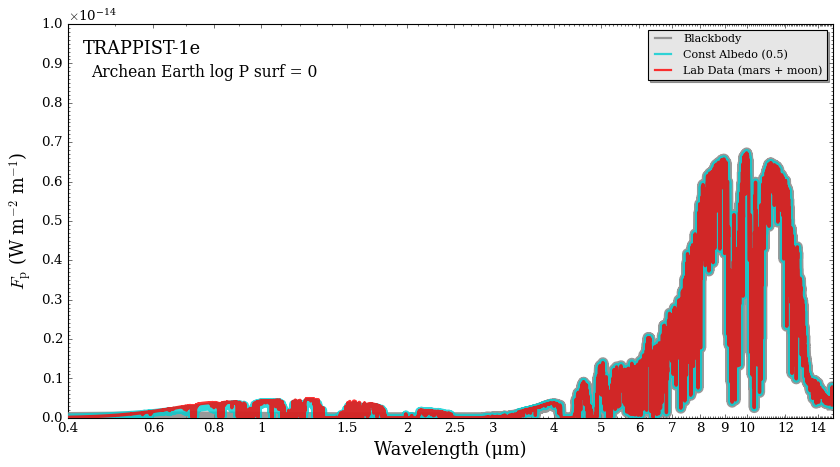

In [24]:
spectra = []   # Empty plot collection

# Add the three model spectra to the plot collection object
spectra = plot_collection(spectrum_blackbody_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_const_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_lab_data_IR_Fp, wl, collection = spectra)

# Produce figure
fig_spec = plot_spectra(spectra, planet, R_to_bin = 1000, plot_full_res = False,
                        spectra_labels = ['Blackbody','Const Albedo (0.5)', 'Lab Data (mars + moon)'],
                        colour_list = ['gray','darkturquoise', 'red'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth log P surf = 0'),
                        figure_shape = 'wide',
                        y_unit = 'Fp',
                        y_max = 1e-14
                        )  

Emissivity has a very minor effect compared to reflection, since IR usually probes atmospheric temperatures higher in the atmospheres.

## 'Bare Rock'

For bare rocks, we set disable_atmosphere to True, and set surface_temp to True (since we want to do emission)

In [25]:
from POSEIDON.core import define_model
import numpy as np

#***** Define models *****#

model_name_blackbody_bare_rock = 'Blackbody-Surface-Bare-Rock'   

bulk_species = []                                      # For bare rocks, we have no bulk or param species
param_species = [] 

# Create a model object with a blackbody surface
model_blackbody_bare_rock = define_model(model_name_blackbody_bare_rock, bulk_species, param_species, 
                                         radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                                         reflection = True, scattering = True, # <----- Set reflection and scattering to True
                                         surface_temp = True,                  # <----- Set surface temperature to True      
                                         disable_atmosphere = True)            # <----- Set disable_atmosphere = True

print(model_blackbody_bare_rock['param_names'])

['R_p_ref' 'T_surf']


In [26]:
model_name_const_bare_rock = 'Constant-Albedo-Surface-Bare-Rock'  

bulk_species = []                     
param_species = [] 

model_const_bare_rock = define_model(model_name_const_bare_rock, bulk_species, param_species, 
                           radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                           reflection = True, scattering = True, # <----- Set reflection and scattering to True
                           surface_model = 'constant',           # <----- Set surface_model to 'constant'
                           surface_temp = True,                  # <----- Set surface temperature to True  
                           disable_atmosphere = True)            # <----- Set disable_atmosphere = True 

print(model_const_bare_rock['param_names'])

['R_p_ref' 'T_surf' 'albedo_surf']


In [27]:
model_name_lab_bare_rock = 'Lab-Data-Albedo-Surface-Bare-Rock'  

bulk_species = []                     
param_species = [] 
surface_components = ['Mars_breccia','Lunar_mare_basalt'] # <----- List surface compoenents here 

model_lab_bare_rock = define_model(model_name_lab_bare_rock, bulk_species, param_species, 
                            radius_unit = 'R_E', surface = True,  # <----- Set surface = True
                            reflection = True, scattering = True, # <----- Set reflection and scattering to True
                            surface_model = 'lab_data',           # <----- Set surface_model to 'lab_data'
                            surface_components = surface_components,  # <----- Input surface_components
                            surface_temp = True,                      # <----- Set surface temperature to True  
                            disable_atmosphere = True)                # <----- Set disable_atmosphere = True

print(model_lab_bare_rock['param_names'])

['R_p_ref' 'T_surf' 'Mars_breccia_percentage'
 'Lunar_mare_basalt_percentage']


In [50]:
from POSEIDON.core import make_atmosphere

R_p_ref = R_p  # Radius is just the planetary radius 

T_surf = 300    # Surface temperature of 300K

surface_params = np.array([T_surf]) #<---- Put surface params into new list, surface_params

P = []      #<---- No atmosphere = no pressure 
P_ref = []

atmosphere_blackbody_bare_rock = make_atmosphere(planet, model_blackbody_bare_rock, P, P_ref, R_p_ref, 
                                                 surface_params = surface_params)  #<---- Put surface params into make_atmosphere

In [51]:
from POSEIDON.core import make_atmosphere
from POSEIDON.visuals import plot_geometry, plot_PT, plot_chem

R_p_ref = R_p  

T_surf = 300          # Surface temperature of 300K
surface_albedo = 0.5  # Half reflecting, half absorbing 

surface_params = np.array([T_surf, surface_albedo,]) #<---- Put surface params into new list, surface_params

# Generate the atmospheres
atmosphere_const_bare_rock = make_atmosphere(planet, model_const_bare_rock, P, P_ref, R_p_ref, 
                                             surface_params = surface_params)  #<---- Put surface params into make_atmosphere   

In [52]:
from POSEIDON.core import make_atmosphere
from POSEIDON.visuals import plot_geometry, plot_PT, plot_chem


R_p_ref = R_p  # Radius at reference pressure

T_surf = 300  # Surface temperature of 300K
Mars_breccia_percentage = 0.5 # 50% mars rock
Lunar_mare_basalt_percentage = 0.5 # 50% moon rock

surface_params = np.array([T_surf,
                           Mars_breccia_percentage,
                           Lunar_mare_basalt_percentage]) #<---- Put surface params into new list, surface_params

# Generate the atmospheres
atmosphere_lab_bare_rock = make_atmosphere(planet, model_lab_bare_rock, P, P_ref, R_p_ref, 
                                           surface_params = surface_params)   #<---- Put surface params into make_atmosphere   

In [53]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

opac_empty = []  # No opac object when there is no atmosphere

spectrum_blackbody_bare_rock_Fp, albedo_blackbody = compute_spectrum(planet, star, model_blackbody_bare_rock, atmosphere_blackbody_bare_rock, 
                                                                     opac_empty, wl,
                                                                     spectrum_type = 'direct_emission', return_albedo = True)

spectrum_const_bare_rock_Fp, albedo_const = compute_spectrum(planet, star, model_const_bare_rock, atmosphere_const_bare_rock, 
                                                             opac_empty, wl,
                                                             spectrum_type = 'direct_emission', return_albedo = True)

spectrum_lab_data_bare_rock_Fp, albedo_labdata = compute_spectrum(planet, star, model_lab_bare_rock, atmosphere_lab_bare_rock, 
                                                                  opac_empty, wl,
                                                                  spectrum_type = 'direct_emission', return_albedo = True)


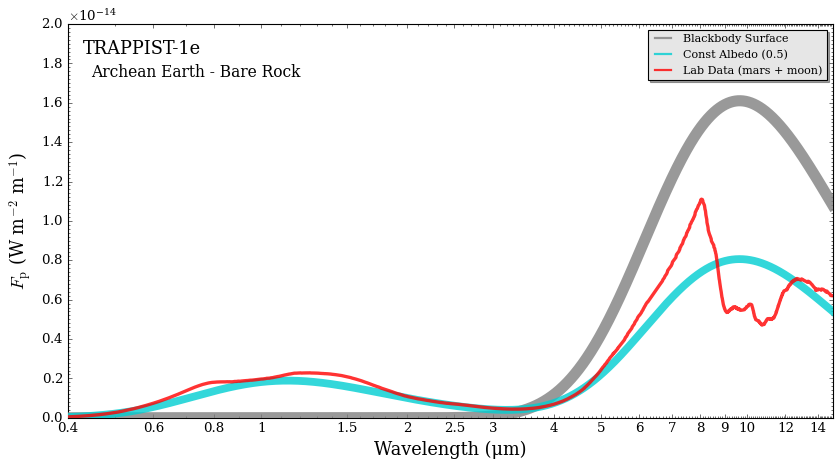

In [54]:
spectra = []   # Empty plot collection

# Add the three model spectra to the plot collection object
spectra = plot_collection(spectrum_blackbody_bare_rock_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_const_bare_rock_Fp, wl, collection = spectra)
spectra = plot_collection(spectrum_lab_data_bare_rock_Fp, wl, collection = spectra)

# Produce figure
fig_spec = plot_spectra(spectra, planet, R_to_bin = 1000, plot_full_res = False,
                        spectra_labels = ['Blackbody Surface','Const Albedo (0.5)', 'Lab Data (mars + moon)'],
                        colour_list = ['gray','darkturquoise', 'red'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth - Bare Rock'),
                        figure_shape = 'wide',
                        y_unit = 'Fp',
                        y_max = 2e-14, y_min = 0
                        )  

We can also look at this spectrum in Fp/Fs space

In [55]:
opac_empty = []

spectrum_blackbody_bare_rock_FpFs, albedo_blackbody = compute_spectrum(planet, star, model_blackbody_bare_rock, atmosphere_blackbody_bare_rock, 
                                                                     opac_empty, wl,
                                                                     spectrum_type = 'emission', return_albedo = True)

spectrum_const_bare_rock_FpFs, albedo_const = compute_spectrum(planet, star, model_const_bare_rock, atmosphere_const_bare_rock, 
                                                             opac_empty, wl,
                                                             spectrum_type = 'emission', return_albedo = True)

spectrum_lab_data_bare_rock_FpFs, albedo_labdata = compute_spectrum(planet, star, model_lab_bare_rock, atmosphere_lab_bare_rock, 
                                                                  opac_empty, wl,
                                                                  spectrum_type = 'emission', return_albedo = True)


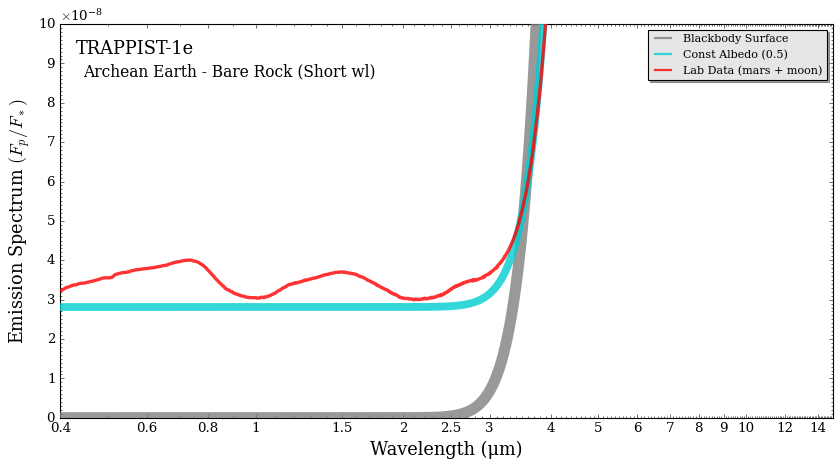

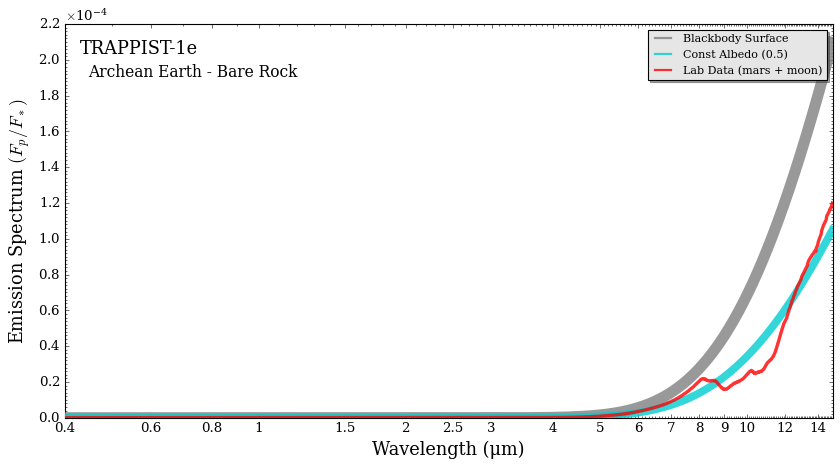

In [56]:
spectra = []   # Empty plot collection

# Add the three model spectra to the plot collection object
spectra = plot_collection(spectrum_blackbody_bare_rock_FpFs, wl, collection = spectra)
spectra = plot_collection(spectrum_const_bare_rock_FpFs, wl, collection = spectra)
spectra = plot_collection(spectrum_lab_data_bare_rock_FpFs, wl, collection = spectra)

# Produce figure
fig_spec = plot_spectra(spectra, planet, R_to_bin = 1000, plot_full_res = False,
                        spectra_labels = ['Blackbody Surface','Const Albedo (0.5)', 'Lab Data (mars + moon)'],
                        colour_list = ['gray','darkturquoise', 'red'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth - Bare Rock (Short wl)'),
                        figure_shape = 'wide',
                        y_unit = 'eclipse_depth',
                        y_max = 1e-7
                        )  

fig_spec = plot_spectra(spectra, planet, R_to_bin = 1000, plot_full_res = False,
                        spectra_labels = ['Blackbody Surface','Const Albedo (0.5)', 'Lab Data (mars + moon)'],
                        colour_list = ['gray','darkturquoise', 'red'], 
                        line_widths = [10,7,3],
                        plt_label = ('Archean Earth - Bare Rock'),
                        figure_shape = 'wide',
                        y_unit = 'eclipse_depth',
                        )  